In [6]:
# Necessary imports\n",
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
file_name = os.path.join(os.getcwd(), "final_dataset.csv")
df = pd.read_csv(file_name, header=0)

TEMP FLUX & COVID (4 States: Washington, Wyoming, Missouri, Georgia)

~ TIME SERIES PLOT 

C:\Users\umafeb\AppData\Local\Temp\ipykernel_16336\4041257841.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


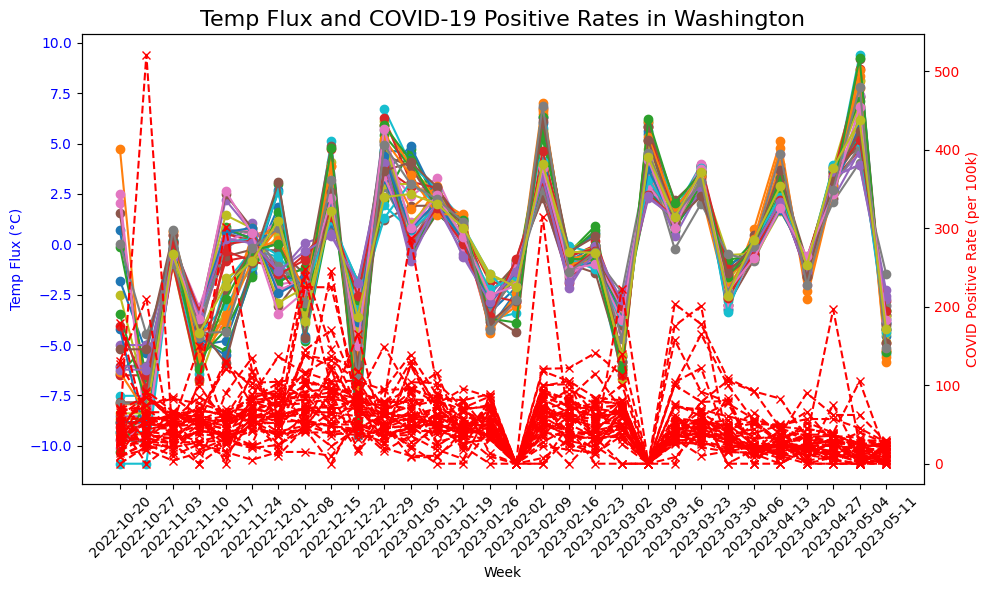

C:\Users\umafeb\AppData\Local\Temp\ipykernel_16336\4041257841.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


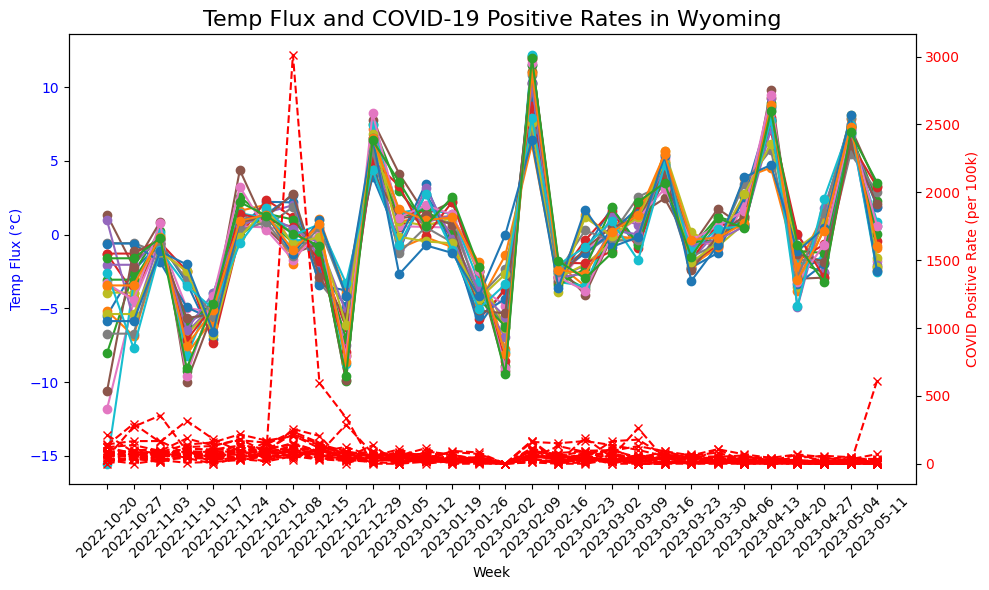

C:\Users\umafeb\AppData\Local\Temp\ipykernel_16336\4041257841.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


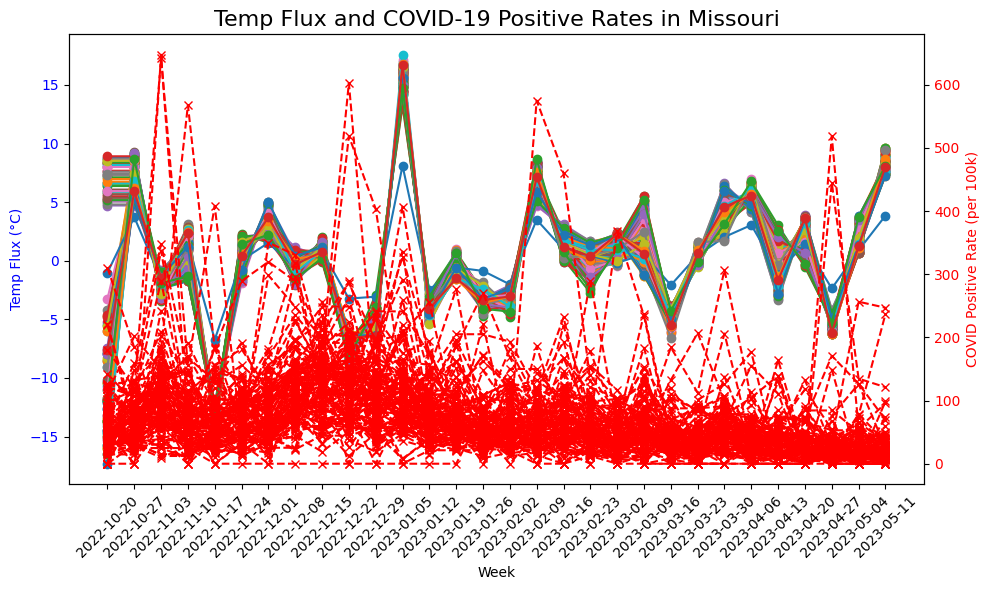

C:\Users\umafeb\AppData\Local\Temp\ipykernel_16336\4041257841.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


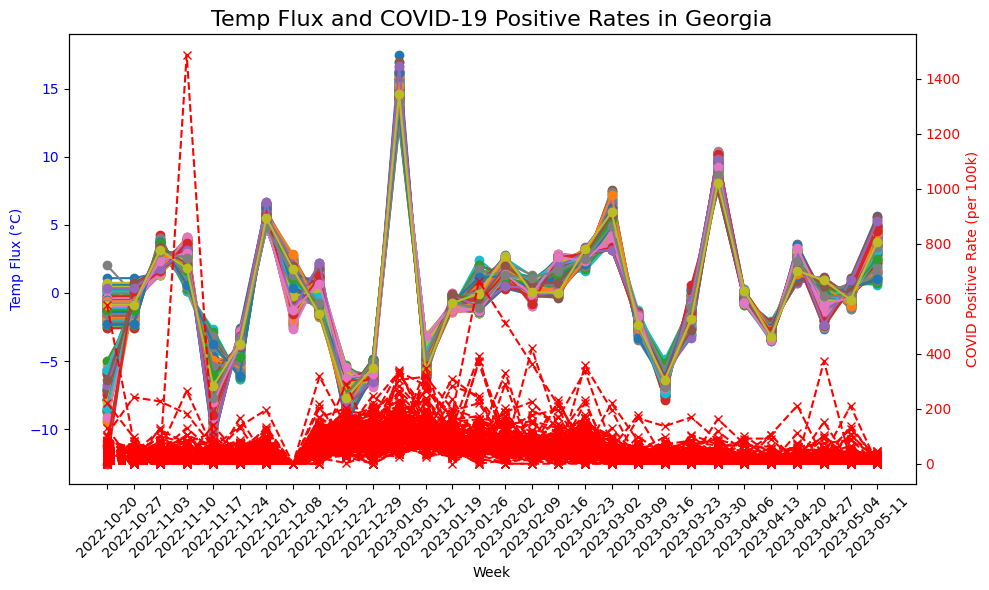

In [8]:
list = ['Washington', 'Wyoming', 'Missouri', 'Georgia']

for state in list:
    df_state = df[df['State'] == state]
    fig, ax1 = plt.subplots(figsize=(10, 6))

    #group features we want to display
    df_grouped = df_state.groupby(['County', 'Week']).agg({   
        'Temp Flux': 'mean',
        'cases_per_100K_7_day_count_change': 'mean'
    }).reset_index()

    #plot temp flux
    for county in df_grouped['County'].unique():
        county_data = df_grouped[df_grouped['County'] == county]
        plt.plot(county_data['Week'], county_data['Temp Flux'], marker='o', label=f'{county}')

    #set labels for y-axis 1(temp flux)
    ax1.set_xlabel('Week')
    ax1.set_ylabel('Temp Flux (°C)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    #create y-axis 2(covid positive rates)
    ax2 = ax1.twinx()

    #plot covid positive rates
    for county in df_grouped['County'].unique():
        county_data = df_grouped[df_grouped['County'] == county]
        ax2.plot(county_data['Week'], county_data['cases_per_100K_7_day_count_change'], marker='x', linestyle='--', color='red')

    #set labels for y-axis 2(covid postive rates)
    ax2.set_ylabel('COVID Positive Rate (per 100k)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    #rotate week ticks
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    #title and layout
    plt.title(f'Temp Flux and COVID-19 Positive Rates in {state}', fontsize=16)
    fig.tight_layout()

    plt.show()


TEMP FLUX & COVID (state over time, USA over time)

~ TIME SERIES PLOT 

C:\Users\umafeb\AppData\Local\Temp\ipykernel_16336\3868699218.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


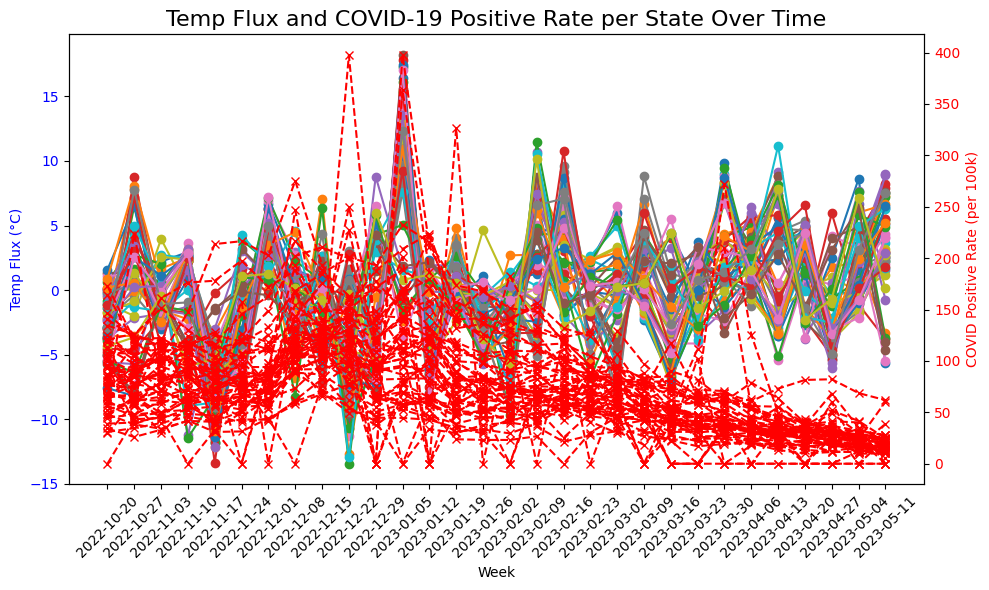

In [9]:
#group by state and week, calculate temp flux and positive rate per state
df_grouped = df.groupby(['State', 'Week']).agg({
    'Temp Flux': 'mean',  
    'cases_per_100K_7_day_count_change': 'mean' 
}).reset_index()

#plot temp flux and covid positive rates per state (51 lines for temp flux, 51 lines for pos rates)
fig, ax1 = plt.subplots(figsize=(10, 6))

#plot temp flux for each state
for state in df_grouped['State'].unique():
    state_data = df_grouped[df_grouped['State'] == state]
    ax1.plot(state_data['Week'], state_data['Temp Flux'], marker='o')

#set y-axis 1 label(temp flux)
ax1.set_xlabel('Week')
ax1.set_ylabel('Temp Flux (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#make second y-axis
ax2 = ax1.twinx()

#plot y-axis 2(covid positive rate)
for state in df_grouped['State'].unique():
    state_data = df_grouped[df_grouped['State'] == state]
    ax2.plot(state_data['Week'], state_data['cases_per_100K_7_day_count_change'], marker='x', linestyle='--', color='red')

#set y-axis 2 label(covid positive rate)
ax2.set_ylabel('COVID Positive Rate (per 100k)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

#rotate week ticks
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.title('Temp Flux and COVID-19 Positive Rate per State Over Time', fontsize=16)
plt.tight_layout()

plt.show()

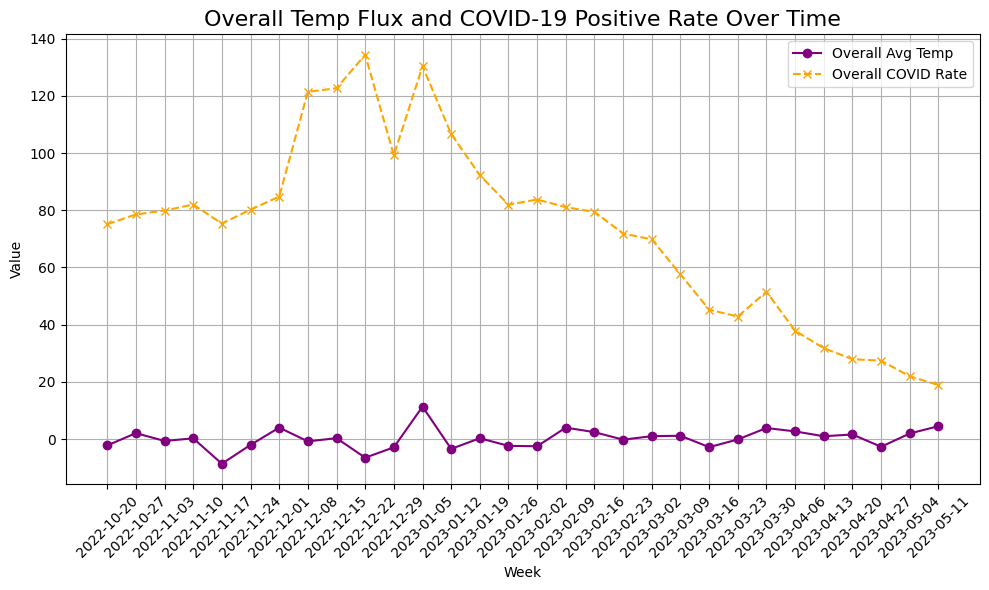

In [10]:
#plot temp flux and covid positive rates for all of USA + puerto rico (1 line for avg temp, 1 line for pos rates)
plt.figure(figsize=(10, 6))

#group by week(state doesn't matter bc taking average of everything)
df_grouped_overall = df.groupby('Week').agg({
    'Temp Flux': 'mean',
    'cases_per_100K_7_day_count_change': 'mean'
}).reset_index()

#plot overall temp flux 
plt.plot(df_grouped_overall['Week'], df_grouped_overall['Temp Flux'], marker='o', color='purple', label='Overall Avg Temp')

#plot overall covid 19 positive rates
plt.plot(df_grouped_overall['Week'], df_grouped_overall['cases_per_100K_7_day_count_change'], marker='x', linestyle='--', color='orange', label='Overall COVID Rate')

plt.xlabel('Week')
plt.ylabel('Value')
plt.title('Overall Temp Flux and COVID-19 Positive Rate Over Time', fontsize=16)

plt.xticks(rotation=45)

#display legend
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()